In [ ]:
# #!/usr/bin/env python
# import os
# import re
# import json
# import glob
# import numpy as np
# import pandas as pd
# import pickle
# # add validation loss.
# from pprint import pprint

# sim_set = "LH"
# snap_str = "044"

# model_dir = os.path.join(f"/disk/xray15/aem2/data/6pams/{sim_set}/IllustrisTNG/models/colours_lfs/{snap_str}")
# plots_dir = os.path.join(f"/disk/xray15/aem2/plots/6pams/{sim_set}/IllustrisTNG/test/sbi_plots/colours_lfs/{snap_str}")


# print(model_dir)
# print(plots_dir)

# # Set display options for full DataFrame visibility
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_colwidth', None)
# pd.set_option('display.width', 1000)


# def find_best_model_with_metrics(model_dir, plots_dir):
#     """
#     Find the best model by examining all pickle files in the model directory,
#     comparing their validation losses, and incorporating metrics data from plots_dir.
    
#     Args:
#         model_dir: Directory containing model files
#         plots_dir: Directory containing metrics files
        
#     Returns:
#         DataFrame with model info sorted by validation loss
#     """
#     print(f"Searching for models in: {model_dir}")
#     print(f"Looking for metrics in: {plots_dir}")
    
#     # List to store model information
#     model_info = []
    
#     # Find all complete.pkl files in subdirectories
#     for root, dirs, files in os.walk(model_dir):
#         for file in files:
#             if file.endswith('.pkl') and 'complete' in file and not file.endswith('_posterior.pkl'):
#                 file_path = os.path.join(root, file)
#                 model_name = os.path.basename(root)
                
#                 try:
#                     # Load the pickle file
#                     with open(file_path, 'rb') as f:
#                         data = pickle.load(f)
                    
#                     # Extract validation loss from the summaries
#                     val_loss = None
#                     if isinstance(data, dict) and 'summaries' in data:
#                         summaries = data['summaries']
                        
#                         # Check format of summaries - could be list or dict
#                         if isinstance(summaries, list) and len(summaries) > 0:
#                             # If it's a list, look at each item
#                             for summary in summaries:
#                                 if 'validation_log_probs' in summary:
#                                     # Get the maximum validation log probability (best performance)
#                                     val_probs = summary['validation_log_probs']
#                                     if val_probs:
#                                         val_loss = max(val_probs)
#                         elif isinstance(summaries, dict):
#                             if 'validation_log_probs' in summaries:
#                                 val_probs = summaries['validation_log_probs']
#                                 if val_probs:
#                                     val_loss = max(val_probs)
                    
#                     # Parse model parameters from directory name
#                     params = {}
#                     parts = model_name.split('_')
#                     for part in parts:
#                         if 'batch' in part:
#                             params['batch_size'] = part.replace('batch', '')
#                         elif 'lr' in part:
#                             params['learning_rate'] = part.replace('lr', '')
#                         elif 'epochs' in part and 'max' not in part:
#                             params['epochs'] = part.replace('epochs', '')
#                         elif 'max_num_epochs' in part:
#                             params['max_epochs'] = part.replace('max_num_epochs', '')
#                         elif 'h' in part and len(part) < 5:  # Avoid matching things like "hidden"
#                             params['hidden_size'] = part.replace('h', '')
#                         elif 't' in part and len(part) < 5:  # Avoid matching words with 't'
#                             params['transforms'] = part.replace('t', '')
#                         elif 'nn' in part:
#                             params['num_nets'] = part.replace('nn', '')
                    
#                     # Add to our list
#                     model_info.append({
#                         'model_dir': root,
#                         'model_file': file,
#                         'model_name': model_name,
#                         'val_loss': val_loss,
#                         **params
#                     })
                    
#                 except Exception as e:
#                     print(f"Error processing {file_path}: {e}")
    
#     # Convert to DataFrame
#     if model_info:
#         df_models = pd.DataFrame(model_info)
        
#         # Sort by validation loss (highest is best for log probabilities)
#         if 'val_loss' in df_models.columns:
#             df_models = df_models.sort_values('val_loss', ascending=False)
        
#         # Now find and parse metrics files in the plots directory
#         metrics_data = []
#         metrics_files = glob.glob(os.path.join(plots_dir, "**", "metrics_*.txt"), recursive=True)
        
#         print(f"Found {len(metrics_files)} metrics files in plots directory.")
        
#         for metrics_file in metrics_files:
#             metrics_dict, config = parse_metrics_file(metrics_file)
#             if metrics_dict:
#                 # Create a row for each parameter
#                 for i, param in enumerate(metrics_dict['parameters']):
#                     metrics_data.append({
#                         'model_name': config,
#                         'parameter': param,
#                         'R²': metrics_dict['R²'][i] if i < len(metrics_dict['R²']) else None,
#                         'RMSE': metrics_dict['RMSE'][i] if i < len(metrics_dict['RMSE']) else None
#                     })
        
#         # Convert metrics data to DataFrame
#         if metrics_data:
#             df_metrics = pd.DataFrame(metrics_data)
            
#             # Pivot the metrics DataFrame to have one row per model with columns for each parameter's metrics
#             df_metrics_pivoted = pd.pivot_table(
#                 df_metrics, 
#                 index='model_name', 
#                 columns='parameter', 
#                 values=['R²', 'RMSE']
#             )
            
#             # Flatten the column multi-index
#             df_metrics_pivoted.columns = [f"{metric}_{param}" for metric, param in df_metrics_pivoted.columns]
#             df_metrics_pivoted = df_metrics_pivoted.reset_index()
            
#             # Merge model info with metrics
#             df_combined = pd.merge(
#                 df_models, 
#                 df_metrics_pivoted, 
#                 left_on='model_name', 
#                 right_on='model_name', 
#                 how='left'
#             )
            
#             return df_combined
        
#         return df_models
#     else:
#         return pd.DataFrame()



# # Execute the function
# df_combined = find_best_model_with_metrics(model_dir, plots_dir)

# # Display results
# if not df_combined.empty:
#     pd.set_option('display.max_columns', None)  # Show all columns
#     pd.set_option('display.max_rows', None)     # Show all rows
#     print("\nModel Comparison (sorted by validation loss):")
#     print(df_combined)
    
#     # Find the best model
#     if 'val_loss' in df_combined.columns and not df_combined['val_loss'].isna().all():
#         best_model = df_combined.iloc[0]
#         print(f"\nBest model found:")
#         print(f"Directory: {best_model['model_dir']}")
#         print(f"File: {best_model['model_file']}")
#         print(f"Validation loss: {best_model['val_loss']}")
        
#         # Get model parameters
#         params_str = []
#         for param in ['batch_size', 'learning_rate', 'hidden_size', 'transforms', 'num_nets', 'epochs', 'max_epochs']:
#             if param in best_model and not pd.isna(best_model[param]):
#                 params_str.append(f"{param}={best_model[param]}")
        
#         print(f"Parameters: {', '.join(params_str)}")
        
#         # Print metrics for best model if available
#         metrics_cols = [col for col in best_model.index if 'R²_' in col or 'RMSE_' in col]
#         if metrics_cols:
#             print("\nMetrics for best model:")
#             for col in metrics_cols:
#                 if not pd.isna(best_model[col]):
#                     print(f"{col}: {best_model[col]}")
#     else:
#         print("\nNo validation loss information found in any models.")
# else:
#     print("\nNo model files found.")

# # If you want to save the results
# results_path = os.path.join(plots_dir, "model_comparison_with_metrics.csv")
# if not df_combined.empty:
#     df_combined.to_csv(results_path, index=False)
#     print(f"\nResults saved to: {results_path}")

# try without function to save posterior to plot summaries

In [4]:
import os
import re
import json
import glob
import numpy as np
import pandas as pd
import pickle
from pprint import pprint
import torch

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sys

sys.path.append("/disk/xray15/aem2/camels/proj1")
from setup_params_LH import * # needed for camels
from variables_config import n_bins_lf, n_bins_colour #, colour_limits, uvlf_limits

# parameters
device = "cuda" if torch.cuda.is_available() else "cpu"
model = "IllustrisTNG"
spec_type = "attenuated"
sps = "BC03"
# 084 = 0.1, 060=1.05, 052=1.48, 044=2
snap = ['044'] # ['086', '052', '060',
bands = "all" # or just GALEX?

colours = True  
luminosity_functions = True
name = f"{model}_{bands}_{sps}_{spec_type}_{n_bins_lf}_{n_bins_colour}"

snap_str = str(snap[0])

cam = camels(model=model, sim_set='LH')


sim_set = "LH"
snap_str = "044"

model_dir = os.path.join(f"/disk/xray15/aem2/data/6pams/{sim_set}/IllustrisTNG/models/colours_lfs/{snap_str}")
plots_dir = os.path.join(f"/disk/xray15/aem2/plots/6pams/{sim_set}/IllustrisTNG/test/sbi_plots/colours_lfs/{snap_str}")

print(f"Searching for models in: {model_dir}")
print(f"Looking for metrics in: {plots_dir}")

# Set display options for full DataFrame visibility
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 1000)


Searching for models in: /disk/xray15/aem2/data/6pams/LH/IllustrisTNG/models/colours_lfs/044
Looking for metrics in: /disk/xray15/aem2/plots/6pams/LH/IllustrisTNG/test/sbi_plots/colours_lfs/044


In [5]:
def parse_metrics_file(file_path):
    """Parse a metrics file and extract R² and RMSE for each parameter."""
    # Extract configuration from file path
    config_match = re.search(r'/([^/]+)/metrics_', file_path)
    config = config_match.group(1) if config_match else os.path.basename(os.path.dirname(file_path))
    
    # Parse the metrics file
    metrics_dict = {
        'config': config,
        'parameters': [],
        'R²': [],
        'RMSE': []
    }
    
    try:
        with open(file_path, 'r') as f:
            lines = f.readlines()
            
        param_pattern = re.compile(r'Metrics for (.*):')
        r2_pattern = re.compile(r'R²: ([-]?\d+\.\d+)')
        rmse_pattern = re.compile(r'RMSE: (\d+\.\d+)')
        
        current_param = None
        
        for line in lines:
            param_match = param_pattern.search(line)
            if param_match:
                current_param = param_match.group(1)
                metrics_dict['parameters'].append(current_param)
                continue
                
            if current_param:
                r2_match = r2_pattern.search(line)
                if r2_match:
                    metrics_dict['R²'].append(float(r2_match.group(1)))
                    
                rmse_match = rmse_pattern.search(line)
                if rmse_match:
                    metrics_dict['RMSE'].append(float(rmse_match.group(1)))
        
        return metrics_dict, config
    
    except Exception as e:
        print(f"Error parsing {file_path}: {e}")
        return None, config

In [6]:

"""
Find the best model by examining all pickle files in the model directory,
comparing their validation losses, and incorporating metrics data from plots_dir.

Args:
    model_dir: Directory containing model files
    plots_dir: Directory containing metrics files
    
Returns:
    DataFrame with model info sorted by validation loss
"""

# List to store model information
model_info = []

# Find all complete.pkl files in subdirectories
for root, dirs, files in os.walk(model_dir):
    for file in files:
        if file.endswith('.pkl') and 'complete' in file and not file.endswith('_posterior.pkl'):
            file_path = os.path.join(root, file)
            model_name = os.path.basename(root)
            
            try:
                # Load the pickle file
                with open(file_path, 'rb') as f:
                    data = pickle.load(f)
                
                # Extract validation loss from the summaries
                val_loss = None
                if isinstance(data, dict) and 'summaries' in data:
                    summaries = data['summaries']
                    
                    # Check format of summaries - could be list or dict
                    if isinstance(summaries, list) and len(summaries) > 0:
                        # If it's a list, look at each item
                        for summary in summaries:
                            if 'validation_log_probs' in summary:
                                # Get the maximum validation log probability (best performance)
                                val_probs = summary['validation_log_probs']
                                if val_probs:
                                    val_loss = max(val_probs)
                    elif isinstance(summaries, dict):
                        if 'validation_log_probs' in summaries:
                            val_probs = summaries['validation_log_probs']
                            if val_probs:
                                val_loss = max(val_probs)
                
                # Parse model parameters from directory name
                params = {}
                parts = model_name.split('_')
                for part in parts:
                    if 'batch' in part:
                        params['batch_size'] = part.replace('batch', '')
                    elif 'lr' in part:
                        params['learning_rate'] = part.replace('lr', '')
                    elif 'epochs' in part and 'max' not in part:
                        params['epochs'] = part.replace('epochs', '')
                    elif 'max_num_epochs' in part:
                        params['max_epochs'] = part.replace('max_num_epochs', '')
                    elif 'h' in part and len(part) < 5:  # Avoid matching things like "hidden"
                        params['hidden_size'] = part.replace('h', '')
                    elif 't' in part and len(part) < 5:  # Avoid matching words with 't'
                        params['transforms'] = part.replace('t', '')
                    elif 'nn' in part:
                        params['num_nets'] = part.replace('nn', '')
                
                # Add to our list
                model_info.append({
                    'model_dir': root,
                    'model_file': file,
                    'model_name': model_name,
                    'val_loss': val_loss,
                    **params
                })
                
            except Exception as e:
                print(f"Error processing {file_path}: {e}")

# Convert to DataFrame
if model_info:
    df_models = pd.DataFrame(model_info)
    
    # Sort by validation loss (highest is best for log probabilities)
    if 'val_loss' in df_models.columns:
        df_models = df_models.sort_values('val_loss', ascending=False)
    
    # Now find and parse metrics files in the plots directory
    metrics_data = []
    metrics_files = glob.glob(os.path.join(plots_dir, "**", "metrics_*.txt"), recursive=True)
    
    print(f"Found {len(metrics_files)} metrics files in plots directory.")
    
    for metrics_file in metrics_files:
        metrics_dict, config = parse_metrics_file(metrics_file)
        if metrics_dict:
            # Create a row for each parameter
            for i, param in enumerate(metrics_dict['parameters']):
                metrics_data.append({
                    'model_name': config,
                    'parameter': param,
                    'R²': metrics_dict['R²'][i] if i < len(metrics_dict['R²']) else None,
                    'RMSE': metrics_dict['RMSE'][i] if i < len(metrics_dict['RMSE']) else None
                })
    
    # Convert metrics data to DataFrame
    if metrics_data:
        df_metrics = pd.DataFrame(metrics_data)
        
        # Pivot the metrics DataFrame to have one row per model with columns for each parameter's metrics
        df_metrics_pivoted = pd.pivot_table(
            df_metrics, 
            index='model_name', 
            columns='parameter', 
            values=['R²', 'RMSE']
        )
        
        # Flatten the column multi-index
        df_metrics_pivoted.columns = [f"{metric}_{param}" for metric, param in df_metrics_pivoted.columns]
        df_metrics_pivoted = df_metrics_pivoted.reset_index()
        
        # Merge model info with metrics
        df_combined = pd.merge(
            df_models, 
            df_metrics_pivoted, 
            left_on='model_name', 
            right_on='model_name', 
            how='left'
        )
            
        # Display results
        if not df_combined.empty:
            pd.set_option('display.max_columns', None)  # Show all columns
            pd.set_option('display.max_rows', None)     # Show all rows
            print("\nModel Comparison (sorted by validation loss):")
            print(df_combined)

    else:
        print(pd.DataFrame())


Found 5 metrics files in plots directory.

Model Comparison (sorted by validation loss):
                                                                                                                                                         model_dir                                           model_file                                                                                   model_name  val_loss batch_size learning_rate epochs hidden_size transforms num_nets  RMSE_$A_{\mathrm{AGN1}}$  RMSE_$A_{\mathrm{AGN2}}$  RMSE_$A_{\mathrm{SN1}}$  RMSE_$A_{\mathrm{SN2}}$  RMSE_$\Omega_m$  RMSE_$\sigma_8$  R²_$A_{\mathrm{AGN1}}$  R²_$A_{\mathrm{AGN2}}$  R²_$A_{\mathrm{SN1}}$  R²_$A_{\mathrm{SN2}}$  R²_$\Omega_m$  R²_$\sigma_8$
0                   /disk/xray15/aem2/data/6pams/LH/IllustrisTNG/models/colours_lfs/044/batch4_lr0.0005_epochs5_max_num_epochs20_validation_fraction0.1_h60_t4_nn2  IllustrisTNG_all_BC03_attenuated_13_13_complete.pkl                   batch4_lr0.0005_epochs5_max_num_ep

In [7]:


# Find the best model
if 'val_loss' in df_combined.columns and not df_combined['val_loss'].isna().all():
    best_model = df_combined.iloc[0]
    print(f"\nBest model found:")
    print(f"Directory: {best_model['model_dir']}")
    print(f"File: {best_model['model_file']}")
    print(f"Validation loss: {best_model['val_loss']}")
    
    # Get model parameters
    params_str = []
    for param in ['batch_size', 'learning_rate', 'hidden_size', 'transforms', 'num_nets', 'epochs', 'max_epochs']:
        if param in best_model and not pd.isna(best_model[param]):
            params_str.append(f"{param}={best_model[param]}")
    
    print(f"Parameters: {', '.join(params_str)}")
    
    # Print metrics for best model if available
    metrics_cols = [col for col in best_model.index if 'R²_' in col or 'RMSE_' in col]
    if metrics_cols:
        print("\nMetrics for best model:")
        for col in metrics_cols:
            if not pd.isna(best_model[col]):
                print(f"{col}: {best_model[col]}")
    else:
        print("\nNo validation loss information found in any models.")
else:
    print("\nNo model files found.")

# If you want to save the results
results_path = os.path.join(plots_dir, "model_comparison_with_metrics.csv")
if not df_combined.empty:
    df_combined.to_csv(results_path, index=False)
    print(f"\nResults saved to: {results_path}")


Best model found:
Directory: /disk/xray15/aem2/data/6pams/LH/IllustrisTNG/models/colours_lfs/044/batch4_lr0.0005_epochs5_max_num_epochs20_validation_fraction0.1_h60_t4_nn2
File: IllustrisTNG_all_BC03_attenuated_13_13_complete.pkl
Validation loss: 2.909077275883068
Parameters: batch_size=4, learning_rate=0.0005, hidden_size=60, transforms=4, num_nets=2, epochs=20

Metrics for best model:
RMSE_$A_{\mathrm{AGN1}}$: 1.074
RMSE_$A_{\mathrm{AGN2}}$: 0.4732
RMSE_$A_{\mathrm{SN1}}$: 0.637
RMSE_$A_{\mathrm{SN2}}$: 0.2246
RMSE_$\Omega_m$: 0.066
RMSE_$\sigma_8$: 0.0632
R²_$A_{\mathrm{AGN1}}$: -0.1072
R²_$A_{\mathrm{AGN2}}$: -0.1988
R²_$A_{\mathrm{SN1}}$: 0.6854
R²_$A_{\mathrm{SN2}}$: 0.7443
R²_$\Omega_m$: 0.7015
R²_$\sigma_8$: 0.7414

Results saved to: /disk/xray15/aem2/plots/6pams/LH/IllustrisTNG/test/sbi_plots/colours_lfs/044/model_comparison_with_metrics.csv


In [8]:
best_model_dir = best_model[0]
print("Best model: ", best_model_dir)

Best model:  /disk/xray15/aem2/data/6pams/LH/IllustrisTNG/models/colours_lfs/044/batch4_lr0.0005_epochs5_max_num_epochs20_validation_fraction0.1_h60_t4_nn2


In [15]:
# best_model['model_file']}
for root, dirs, files in os.walk(best_model_dir):
    for file in files:
        if file.endswith('.pkl') and 'complete' in file and not file.endswith('_posterior.pkl'):
            bm_file_path = os.path.join(root, file)
            bm_model_name = os.path.basename(root)
            
            try:
                # Load the pickle file
                with open(bm_file_path, 'rb') as f:
                    data = pickle.load(f)
                
                # Extract validation loss from the summaries
                val_loss = None
                if isinstance(data, dict) and 'summaries' in data:
                    bm_summaries = data['summaries']
                    #print(bm_summaries)
                    print(data.keys)
                    
            except Exception as e:
                print(f"Error processing {bm_file_path}: {e}")

<built-in method keys of dict object at 0x7fa122e10240>


In [17]:
import pickle

# Load your pickle file
with open(bm_file_path, "rb") as f:
    data = pickle.load(f)

# Check the top level keys if it's a dictionary
if isinstance(data, dict):
    print("Top level keys:", list(data.keys()))
    
    # Check if posterior_ensemble exists at the top level
    if 'posterior_ensemble' in data:
        print("Found posterior_ensemble at top level!")
    
    # If there's a model key, check its attributes
    if 'model' in data:
        print("\nModel attributes:", [attr for attr in dir(data['model']) if not attr.startswith('_')])
        
        # Check if model has posterior_ensemble
        if hasattr(data['model'], 'posterior_ensemble'):
            print("Found posterior_ensemble in model!")

Top level keys: ['posterior_ensemble', 'summaries', 'config']
Found posterior_ensemble at top level!


In [14]:
bm_summaries[0]

{'epochs_trained': [0, 17],
 'best_validation_log_prob': [-inf, 2.8014558174393396],
 'validation_log_probs': [-0.36858922243118286,
  0.8882932229475542,
  1.5211412906646729,
  1.7500282580202275,
  1.9059356342662463,
  1.6854437698017468,
  2.4667068232189524,
  2.5169082663275977,
  2.2238556417551907,
  2.7160006273876536,
  2.516271807930686,
  2.8014558174393396,
  2.2208210988478227,
  2.6293005130507727,
  2.678234116597609,
  2.6832708662206475,
  2.7811941612850535],
 'training_log_probs': [-1.4160918133093578,
  0.5866861567638888,
  1.538139019272115,
  2.078525919135254,
  2.3368084808387377,
  2.569078299078611,
  2.7306161446146446,
  2.9383923783160673,
  3.110915965372973,
  3.2366827401784386,
  3.322862376671026,
  3.4030825826201108,
  3.507205622030957,
  3.5473407678084796,
  3.702580240103278,
  3.7250895116588856,
  3.9711634605237753],
 'epoch_durations_sec': [13.389852046966553,
  13.038445472717285,
  13.06861424446106,
  13.055805206298828,
  13.0517961978

In [20]:
posterior_ensemble = data["posterior_ensemble"]
posterior_ensemble

NeuralPosteriorEnsemble sampler for potential_fn=<EnsemblePotential>

In [22]:
import pickle

# Load the pickle file
with open(bm_file_path, "rb") as f:
    data = pickle.load(f)

# Look for x_test in various common locations
if isinstance(data, dict):
    # Try direct access
    if 'x_test' in data:
        x_test = data['x_test']
    # Try in 'data' subkey
    elif 'data' in data and isinstance(data['data'], dict) and 'x_test' in data['data']:
        x_test = data['data']['x_test']
    # Try in 'test_data' subkey
    elif 'test_data' in data:
        x_test = data['test_data']
    # Check if there's a dedicated test dataset
    elif 'test_dataset' in data and hasattr(data['test_dataset'], 'x'):
        x_test = data['test_dataset'].x
    else:
        print("Couldn't find x_test directly. Available keys:", list(data.keys()))
        x_test = None
else:
    # If data isn't a dictionary, check if it has x_test as an attribute
    if hasattr(data, 'x_test'):
        x_test = data.x_test
    else:
        print("Data is not a dictionary and doesn't have x_test attribute")
        x_test = None

# Now you can use x_test
if x_test is not None:
    print(f"Found x_test with shape: {x_test.shape if hasattr(x_test, 'shape') else 'unknown'}")

Couldn't find x_test directly. Available keys: ['posterior_ensemble', 'summaries', 'config']


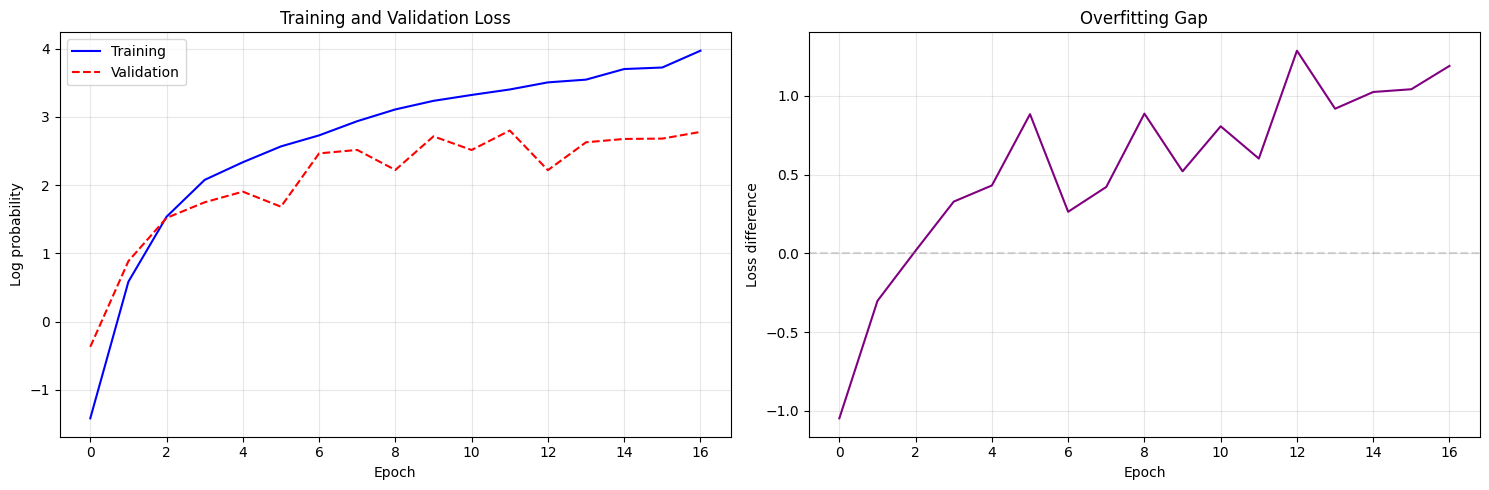

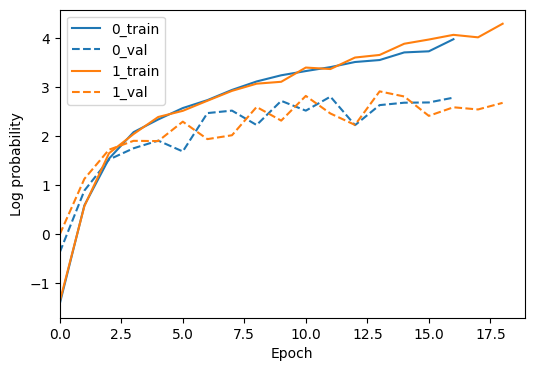

In [24]:
from ili.validation.metrics import PosteriorCoverage

# First plot: Training diagnostics with two subplots
def plot_training_diagnostics(summaries):
    """Plot training diagnostics with loss and overfitting gap"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Loss curves
    train_losses = summaries[0]['training_log_probs']
    val_losses = summaries[0]['validation_log_probs']
    epochs = range(len(train_losses))
    
    ax1.plot(epochs, train_losses, '-', label='Training', color='blue')
    ax1.plot(epochs, val_losses, '--', label='Validation', color='red')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Log probability')
    ax1.set_title('Training and Validation Loss')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Overfitting gap
    gap = np.array(train_losses) - np.array(val_losses)
    ax2.plot(epochs, gap, '-', color='purple')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss difference')
    ax2.set_title('Overfitting Gap')
    ax2.axhline(y=0, color='gray', linestyle='--', alpha=0.3)
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    return fig

# Second plot: Ensemble training curves
def plot_ensemble_training(summaries):
    """Plot training curves for each ensemble member"""
    fig, ax = plt.subplots(1, 1, figsize=(6,4))
    c = list(mcolors.TABLEAU_COLORS)
    for i, m in enumerate(summaries):
        ax.plot(m['training_log_probs'], ls='-', label=f"{i}_train", c=c[i])
        ax.plot(m['validation_log_probs'], ls='--', label=f"{i}_val", c=c[i])
    ax.set_xlim(0)
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Log probability')
    ax.legend()
    return fig

# Save training plots in the new directory
fig1 = plot_training_diagnostics(bm_summaries)
plt.savefig(os.path.join(best_model_dir, f'training_analysis_{name}.png'),
            dpi=300, bbox_inches='tight')
plt.show()
plt.close()

fig2 = plot_ensemble_training(bm_summaries)
plt.savefig(os.path.join(best_model_dir, f'ensemble_training_{name}.png'),
            dpi=300, bbox_inches='tight')
plt.show()
plt.close()